In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [3]:
data = pd.read_csv('/content/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [6]:
data['Married']=data['Married'].map({'Yes':1,'No':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y


In [7]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,2,Y


In [8]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y


In [9]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender']= data['Gender'].fillna(data['Gender']).mode()[0]

In [12]:
data['Married']= data['Married'].fillna(data['Married']).mode()[0]

In [13]:
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-13-d550c6f6dffc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [14]:
data['Dependents']=data['Dependents'].fillna(data['Dependents']).mode()[0]

In [15]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed']).mode()[0]

In [16]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount']).mode()[0]

In [17]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term']).mode()[0]

In [18]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History']).mode()[0]

In [19]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 62.5+ KB


In [23]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 62.5+ KB


<ipython-input-25-016be9350fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')
<ipython-input-25-016be9350fb2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserW

<Axes: xlabel='Credit_History', ylabel='Density'>

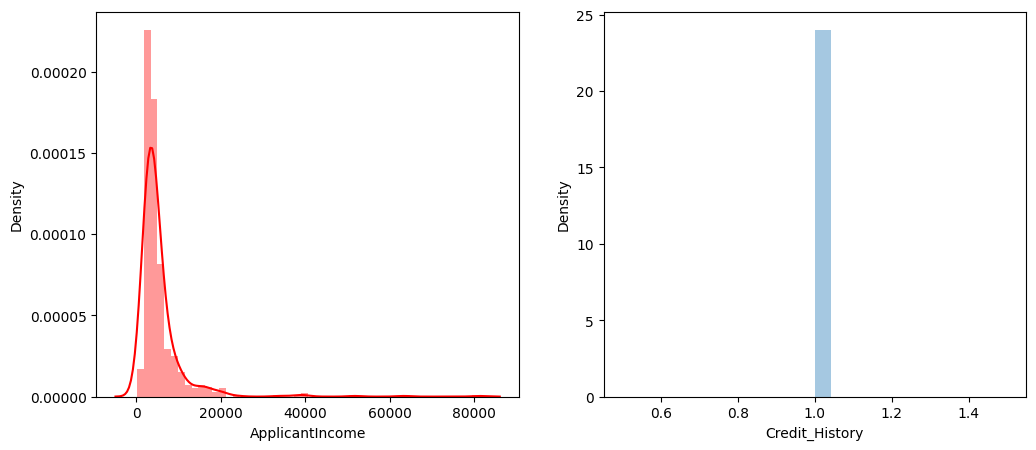

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])

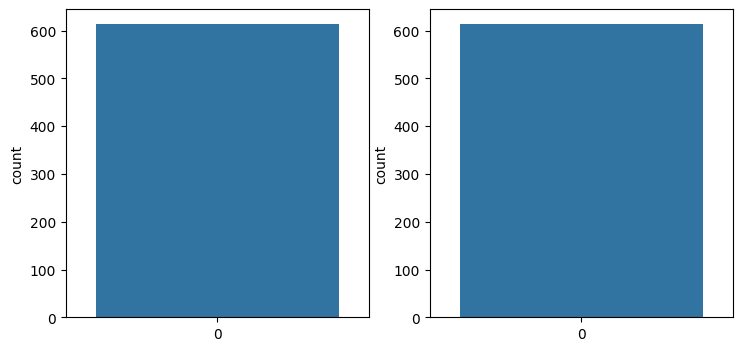

In [26]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

<>:7: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?


TypeError: ignored

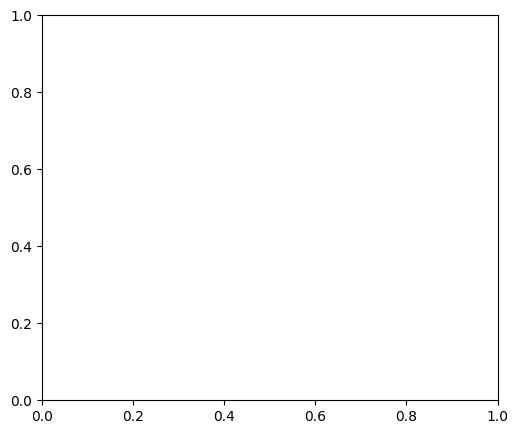

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(data['Married'], hue=data['Gender']())
plt.subplot(132)
sns.countplot(data['Self_Employed'], hue=data['Education']())
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'()])

In [33]:
pd.crosstab(data['Gender'],[data['Self_Employed']])

Self_Employed,0
Gender,
0,614


In [34]:
sns.swarmplot(data['Gender'],data['ApplicantIncome'], hue = data['Loan_Status'])

TypeError: ignored

In [35]:
from imblearn.combine import SMOTETomek

In [36]:
smote = SMOTETomek()

In [37]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [39]:
x.shape

(614, 12)

In [40]:
y.shape

(614,)

In [59]:
x_bal,y_bal = smote.fit_resample(x,y)

SyntaxError: ignored

In [45]:
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


NameError: ignored

In [47]:
names = x_bal.columns

NameError: ignored

In [48]:
x_bal.head()

NameError: ignored

In [57]:
sc=StandardScaler()
x_bal = sc.fit_transform(x_bal)

NameError: ignored

In [61]:
x_bal = pd.DataFrame(x_bal,columns=names)
x_bal.head()

NameError: ignored

In [62]:
x_train, x_test, y_train, y_test + train_test_split(x_bal,y_bal, test_size+0.33, random_state=42)

NameError: ignored

In [63]:
x_train.shape

NameError: ignored

In [64]:
x_test.shape

NameError: ignored

In [65]:
y_train.shape, y_test.shape

NameError: ignored

# **Model building**


In [66]:
def RandomForest(x_train,x_train,y_test):
  model = RandomForestClassifier()
  model.fit(x_train,y_train)
  y_tr = model.predict(x_train)
  print(accuracy_score(y_tr,y_train))
  yPred = model.predict(X_test)
  print(accuracy_score(yPred,y_test))

SyntaxError: ignored

In [67]:
RandomForest(x_train,x_test,y_train,y_test)

NameError: ignored

In [68]:
def decisionTree(x_train,x_test,y_train,y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    yPred = model.predict(x_tesst)
    print(accuracy_sscore(ypred,y_test))

In [69]:
decisionTree(x_train,x_test,y_train,y_test)

NameError: ignored

In [70]:
def KNN(x_train, x_test, y_train, y_test):
  knn + KNeighborsClassifier()
  knn.fit(x_train,y_train)
  yPred = knn.predict(x_test)
  print('***KNeighborsClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_tesst,yPred))
  print('classification report')
  print(classification_report(y_test,yPred))

In [71]:
KNN(x_train,x_test,y_train,y_test)

NameError: ignored

In [72]:
def XGP(x_train,x_test,y_train,y_test):
    model = GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print(accuracy_score(yPred,y_test))

In [73]:
XGB(x_train,x_test,y_train,y_test)

NameError: ignored

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras,layers import Dense

SyntaxError: ignored

In [75]:
classifier = Sequential()
classifier.add(Dense(unitss=100,activation='relu',input_din-11))

SyntaxError: ignored

In [76]:
classifier.add(Dense(units=50,activation='relu'))

NameError: ignored

In [77]:
classifier.add(Dense(units=1, activation='sigmoid'))

NameError: ignored

In [78]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

NameError: ignored

In [79]:
classifier.fix(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

NameError: ignored

In [80]:
y_pred = classifier.predict(x_test)

NameError: ignored

In [81]:
y_pred

NameError: ignored

In [82]:
y_pred + y_pred.astype(int)
y_pred

NameError: ignored

In [83]:
print(accuracy_score(y_pred, y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))

NameError: ignored

*hyper runnig pareametters*

In [84]:
rf = RandomForestClassifier()

In [85]:
from backcall.backcall import Parameter
Parameters ={
    'n_estimators' : [1,20,30,55,68,74,90,120,115],
    'criterion':['gini','entropy']
    'max_depth':[2,5,8,10],'verbose':[1,2,3,4,5,6,8,9,10]
}

SyntaxError: ignored

In [86]:
RCV + RandomizedSearchCV(estimator=rf,param_distributions=Parameters,cv=10,n_iter=4)

NameError: ignored

In [87]:
RCV.fit(x_train,y_train)

NameError: ignored

In [88]:
bt_params =RCV.best_params_
bt_score = RCV.best_score_

NameError: ignored

In [89]:
bt_parms

NameError: ignored

In [90]:
bt_score

NameError: ignored

In [91]:
def RandomForest(x_train,x_test,y_train,y_test);
    model = RandomForestClassifier(verbose= ,n_estimators= , max_features='',max_depth=,criterion='')
    model.fit(x_train,y_train)
    y_tr = model.predict(x_train)
    print("Training Accuracy")
    print(accuracy_score(y_tr,y_train))
    yPred = model.predict(x_test)
    print('Testing Accuracy')
    print(accuracy_score(yPred,y_test))

SyntaxError: ignored

In [92]:
model = RandomForestClassifier(verbose= , n_estimators= ,max_features= '',max_depth= ,criterion='')
model.fit(x_train,y_train)

SyntaxError: ignored

In [93]:
RandomForest(x_train,x_test,y_train,y_test)

NameError: ignored

saving model

In [97]:
import pickle


In [99]:
pickel.dump(model,open('rdf','pkl','wb'))

NameError: ignored